In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!python -m pip install fipy

  Obtaining dependency information for fipy from https://files.pythonhosted.org/packages/3c/90/35015c5e45573144c8c05fc4ce559316205b128eb32fa8126f16f6deb6ea/FiPy-3.4.4-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.6/443.6 kB 8.9 MB/s eta 0:00:00


In [3]:
import math
import numpy as np
import  scipy
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

from fipy import Variable, FaceVariable, CellVariable, Grid1D, Grid2D, ExplicitDiffusionTerm, TransientTerm, DiffusionTerm,ImplicitSourceTerm
from fipy.tools import numerix
from fipy.viewers.matplotlibViewer.matplotlib1DViewer import Matplotlib1DViewer as Viewer1D
from fipy.viewers.matplotlibViewer.matplotlib2DViewer import Matplotlib2DViewer as Viewer2D

In [4]:
#1) parameters
omega_0 = 1
g= 0.1 * omega_0
F = 1.5 *omega_0
#gamma= 0.05 *omega_0
gamma= omega_0

#2) mesh
nx=ny=50
dx=0.1
dy=0.1
mesh = Grid2D(nx=nx,ny=ny,dx=dx,dy=dy)

#y = CellVariable(mesh=mesh)
#x = CellVariable(mesh=mesh)
x = mesh.x
y = mesh.y
#TODO: figure out why hasold has to be true, and why in simpler examples its not specified
chiR11 = CellVariable(name=r"$Re(\chi_{11})$", mesh=mesh, hasOld=True)
chiR10 = CellVariable(name=r"$Re(\chi_{10})$", mesh=mesh, hasOld=True)
chiR01 = CellVariable(name=r"$Re(\chi_{01})$", mesh=mesh, hasOld=True)
chiR00 = CellVariable(name=r"$Re(\chi_{00})$", mesh=mesh, hasOld=True)

chiI11 = CellVariable(name=r"$Im(\chi_{11})$", mesh=mesh, hasOld=True)
chiI10 = CellVariable(name=r"$Im(\chi_{10})$", mesh=mesh, hasOld=True)
chiI01 = CellVariable(name=r"$Im(\chi_{01})$", mesh=mesh, hasOld=True)
chiI00 = CellVariable(name=r"$Im(\chi_{00})$", mesh=mesh, hasOld=True)

In [5]:
#boundary conditions
chiR11.constrain(0., where=mesh.facesTop)
chiR11.constrain(0., where=mesh.facesBottom)
chiR11.constrain(0., where=mesh.facesLeft)
chiR11.constrain(0., where=mesh.facesRight)

chiR10.constrain(0., where=mesh.facesTop)
chiR10.constrain(0., where=mesh.facesBottom)
chiR10.constrain(0., where=mesh.facesLeft)
chiR10.constrain(0., where=mesh.facesRight)

chiR01.constrain(0., where=mesh.facesTop)
chiR01.constrain(0., where=mesh.facesBottom)
chiR01.constrain(0., where=mesh.facesLeft)
chiR01.constrain(0., where=mesh.facesRight)

chiR00.constrain(0., where=mesh.facesTop)
chiR00.constrain(0., where=mesh.facesBottom)
chiR00.constrain(0., where=mesh.facesLeft)
chiR00.constrain(0., where=mesh.facesRight)

chiI11.constrain(0., where=mesh.facesTop)
chiI11.constrain(0., where=mesh.facesBottom)
chiI11.constrain(0., where=mesh.facesLeft)
chiI11.constrain(0., where=mesh.facesRight)

chiI10.constrain(0., where=mesh.facesTop)
chiI10.constrain(0., where=mesh.facesBottom)
chiI10.constrain(0., where=mesh.facesLeft)
chiI10.constrain(0., where=mesh.facesRight)

chiI01.constrain(0., where=mesh.facesTop)
chiI01.constrain(0., where=mesh.facesBottom)
chiI01.constrain(0., where=mesh.facesLeft)
chiI01.constrain(0., where=mesh.facesRight)

chiI00.constrain(0., where=mesh.facesTop)
chiI00.constrain(0., where=mesh.facesBottom)
chiI00.constrain(0., where=mesh.facesLeft)
chiI00.constrain(0., where=mesh.facesRight)

In [6]:
'''#using internal boundary conditions using mask
mask = ((x == nx*dx/2-1) & (y==ny*dy/2-1))
largeValue = 1e+7
valueI = 0 #this is very small because we want chiI00=chiI11=0 
valueR = 1
'''

'#using internal boundary conditions using mask\nmask = ((x == nx*dx/2-1) & (y==ny*dy/2-1))\nlargeValue = 1e+7\nvalueI = 0 #this is very small because we want chiI00=chiI11=0 \nvalueR = 1\n'

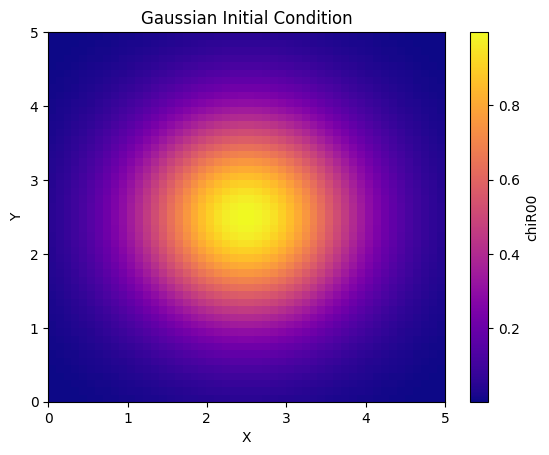

In [7]:
# Set the Gaussian initial condition
mean = [nx * dx / 2, ny * dy / 2]  # Center of the Gaussian surface
covariance = [[1, 0], [0,1]]  # Covariance matrix

#mean = [0,0]  
#covariance = [[0.0007, 0], [0, 0.0007]]  
#Generate coordinates for the grid
X, Y = mesh.cellCenters[0], mesh.cellCenters[1]

# Evaluate the Gaussian surface
gaussian_surface = multivariate_normal(mean=mean, cov=covariance)
Z = np.zeros_like(X)
Xm=X.value.reshape([nx,ny])
Ym=Y.value.reshape([nx,ny])

Z = gaussian_surface.pdf(np.column_stack((X.value.flat, Y.value.flat)))
#Z /= Z.max()

# Assign the Gaussian surface to the cell variable
chiR00.setValue(2*math.pi*Z)

plt.pcolor(Xm,Ym,chiR00.value.reshape((nx, ny)), cmap='plasma')

plt.colorbar(label='chiR00')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Initial Condition')
plt.show()

In [8]:
Z.max()

0.1587575526791557

In [9]:
index_where_1 = np.where(Z ==Z.max())
index_where_1

(array([1224, 1225, 1274, 1275]),)

In [10]:
eq1R = TransientTerm(var=chiR11) == -((g/2)* chiI10).grad[0] +((g/2)*chiR10).grad[1]- ((g/2)*chiI01.grad[0]) - ((g/2)*chiR01.grad[1]) - ((g/2)*(x-(nx*dx)/2)*chiI10) + ((g/2)*(y-(ny*dy)/2)*chiR10) - ((g/2)*(x-(nx*dx)/2)*chiI01) - ((g/2)*(y-(ny*dy)/2)*chiR01) -2*F*(x-(nx*dx)/2)*chiI11 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiR11 - gamma*0.5*((x-(nx*dx)/2)*chiR11.grad[0]+(y-(ny*dy)/2)*chiR11.grad[1]) 
eq1I = TransientTerm(var=chiI11) == ((g/2)* chiR10).grad[0] +((g/2)*chiI10).grad[1]+ ((g/2)*chiR01.grad[0]) - ((g/2)*chiI01.grad[1]) + ((g/2)*(x-(nx*dx)/2)*chiR10) + ((g/2)*(y-(ny*dy)/2)*chiI10) - ((g/2)*(x-(nx*dx)/2)*chiR01) - ((g/2)*(y-(ny*dy)/2)*chiI01) +2*F*(x-(nx*dx)/2)*chiR11 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiI11 - gamma*0.5*((x-(nx*dx)/2)*chiI11.grad[0]+(y-(ny*dy)/2)*chiI11.grad[1]) 

eq2R = TransientTerm(var=chiR10) == -((g/2)* chiI00).grad[0] +((g/2)*chiI11).grad[0]- ((g/2)*chiR00.grad[1]) + ((g/2)*chiR11.grad[1]) - ((g/2)*(x-(nx*dx)/2)*chiI11) - ((g/2)*(x-(nx*dx)/2)*chiI00) - ((g/2)*(y-(ny*dy)/2)*chiR11) - ((g/2)*(y-(ny*dy)/2)*chiR00) -2*F*(x-(nx*dx)/2)*chiI10 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiR10 - gamma*0.5*((x-(nx*dx)/2)*chiR10.grad[0]+(y-(ny*dy)/2)*chiR10.grad[1]) 
eq2I = TransientTerm(var=chiI10) == -((g/2)* chiI00).grad[1] +((g/2)*chiI11).grad[1]+ ((g/2)*chiR00.grad[0]) - ((g/2)*chiR11.grad[0]) + ((g/2)*(x-(nx*dx)/2)*chiR11) - ((g/2)*(y-(ny*dy)/2)*chiI00) - ((g/2)*(y-(ny*dy)/2)*chiI11) + ((g/2)*(x-(nx*dx)/2)*chiR00) +2*F*(x-(nx*dx)/2)*chiR10 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiI10 - gamma*0.5*((x-(nx*dx)/2)*chiI10.grad[0]+(y-(ny*dy)/2)*chiI10.grad[1]) 


eq3R = TransientTerm(var=chiR01) == -((g/2)*(x-(nx*dx)/2)*chiI11) - ((g/2)*(x-(nx*dx)/2)*chiI00) + ((g/2)*(y-(ny*dy)/2)*chiR11) + ((g/2)*(y-(ny*dy)/2)*chiR00) + ((g/2)*chiI11).grad[0] - ((g/2)*chiR11.grad[1]) - ((g/2)* chiI00).grad[0] + ((g/2)*chiR00.grad[1]) -2*F*(x-(nx*dx)/2)*chiI01 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiR01 - gamma*0.5*((x-(nx*dx)/2)*chiR01.grad[0]+(y-(ny*dy)/2)*chiR01.grad[1]) 
eq3I = TransientTerm(var=chiI01) == ((g/2)*(x-(nx*dx)/2)*chiR11) + ((g/2)*(x-(nx*dx)/2)*chiR00) + ((g/2)*(y-(ny*dy)/2)*chiI11) + ((g/2)*(y-(ny*dy)/2)*chiI00) - ((g/2)*chiR11).grad[0] - ((g/2)*chiI11.grad[1]) + ((g/2)* chiR00).grad[0] + ((g/2)*chiI00.grad[1]) +2*F*(x-(nx*dx)/2)*chiR01 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiI01 - gamma*0.5*((x-(nx*dx)/2)*chiI01.grad[0]+(y-(ny*dy)/2)*chiI01.grad[1]) 

eq4R = TransientTerm(var=chiR00) == - ((g/2)*(x-(nx*dx)/2)*chiI10) + ((g/2)*(y-(ny*dy)/2)*chiR10) - ((g/2)*(x-(nx*dx)/2)*chiI01) - ((g/2)*(y-(ny*dy)/2)*chiR01) + ((g/2)* chiI10).grad[0] - ((g/2)*chiR10).grad[1] + ((g/2)*chiI01.grad[0]) + ((g/2)*chiR01.grad[1]) -2*F*(x-(nx*dx)/2)*chiI00 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiR00 - gamma*0.5*((x-(nx*dx)/2)*chiR00.grad[0]+(y-(ny*dy)/2)*chiR00.grad[1])
eq4I = TransientTerm(var=chiI00) == + ((g/2)*(x-(nx*dx)/2)*chiR10) + ((g/2)*(y-(ny*dy)/2)*chiI10) + ((g/2)*(x-(nx*dx)/2)*chiR01) - ((g/2)*(y-(ny*dy)/2)*chiI01) - ((g/2)* chiR10).grad[0] - ((g/2)*chiI10).grad[1] - ((g/2)*chiR01.grad[0]) + ((g/2)*chiI01.grad[1]) +2*F*(x-(nx*dx)/2)*chiR00 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiI00 - gamma*0.5*((x-(nx*dx)/2)*chiI00.grad[0]+(y-(ny*dy)/2)*chiI00.grad[1]) 

In [11]:
'''eq1R = TransientTerm(var=chiR11) == - ImplicitSourceTerm(mask*largeValue,var=chiR11) - mask*largeValue*chiR00 - (mask*largeValue*valueR)-((g/2)* chiI10).grad[0] +((g/2)*chiR10).grad[1]- ((g/2)*chiI01.grad[0]) - ((g/2)*chiR01.grad[1]) - ((g/2)*(x-(nx*dx)/2)*chiI10) + ((g/2)*(y-(ny*dy)/2)*chiR10) - ((g/2)*(x-(nx*dx)/2)*chiI01) - ((g/2)*(y-(ny*dy)/2)*chiR01) -2*F*(x-(nx*dx)/2)*chiI11 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiR11 - gamma*0.5*((x-(nx*dx)/2)*chiR11.grad[0]+(y-(ny*dy)/2)*chiR11.grad[1]) 

#contraining below equation to be zero at x=y=0 (or atleast for x and y close to 0)
# using: - ImplicitSourceTerm(mask*largeValue)+ (mask*largeValue*value)
# for chiR00 and chiR11: - ImplicitSourceTerm(mask*largeValue,var=chiR11) - mask*largeValue*chiR00 + (mask*largeValue*valueR)
eq1I = TransientTerm(var=chiI11) == - ImplicitSourceTerm(mask*largeValue,var=chiI11)+ (mask*largeValue*valueI)+((g/2)* chiR10).grad[0] +((g/2)*chiI10).grad[1]+ ((g/2)*chiR01.grad[0]) - ((g/2)*chiI01.grad[1]) + ((g/2)*(x-(nx*dx)/2)*chiR10) + ((g/2)*(y-(ny*dy)/2)*chiI10) - ((g/2)*(x-(nx*dx)/2)*chiR01) - ((g/2)*(y-(ny*dy)/2)*chiI01) +2*F*(x-(nx*dx)/2)*chiR11 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiI11 - gamma*0.5*((x-(nx*dx)/2)*chiI11.grad[0]+(y-(ny*dy)/2)*chiI11.grad[1]) 

eq2R = TransientTerm(var=chiR10) == -((g/2)* chiI00).grad[0] +((g/2)*chiI11).grad[0]- ((g/2)*chiR00.grad[1]) + ((g/2)*chiR11.grad[1]) - ((g/2)*(x-(nx*dx)/2)*chiI11) - ((g/2)*(x-(nx*dx)/2)*chiI00) - ((g/2)*(y-(ny*dy)/2)*chiR11) - ((g/2)*(y-(ny*dy)/2)*chiR00) -2*F*(x-(nx*dx)/2)*chiI10 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiR10 - gamma*0.5*((x-(nx*dx)/2)*chiR10.grad[0]+(y-(ny*dy)/2)*chiR10.grad[1]) 
eq2I = TransientTerm(var=chiI10) == -((g/2)* chiI00).grad[1] +((g/2)*chiI11).grad[1]+ ((g/2)*chiR00.grad[0]) - ((g/2)*chiR11.grad[0]) + ((g/2)*(x-(nx*dx)/2)*chiR11) - ((g/2)*(y-(ny*dy)/2)*chiI00) - ((g/2)*(y-(ny*dy)/2)*chiI11) + ((g/2)*(x-(nx*dx)/2)*chiR00) +2*F*(x-(nx*dx)/2)*chiR10 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiI10 - gamma*0.5*((x-(nx*dx)/2)*chiI10.grad[0]+(y-(ny*dy)/2)*chiI10.grad[1]) 


eq3R = TransientTerm(var=chiR01) == -((g/2)*(x-(nx*dx)/2)*chiI11) - ((g/2)*(x-(nx*dx)/2)*chiI00) + ((g/2)*(y-(ny*dy)/2)*chiR11) + ((g/2)*(y-(ny*dy)/2)*chiR00) + ((g/2)*chiI11).grad[0] - ((g/2)*chiR11.grad[1]) - ((g/2)* chiI00).grad[0] + ((g/2)*chiR00.grad[1]) -2*F*(x-(nx*dx)/2)*chiI01 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiR01 - gamma*0.5*((x-(nx*dx)/2)*chiR01.grad[0]+(y-(ny*dy)/2)*chiR01.grad[1]) 
eq3I = TransientTerm(var=chiI01) == ((g/2)*(x-(nx*dx)/2)*chiR11) + ((g/2)*(x-(nx*dx)/2)*chiR00) + ((g/2)*(y-(ny*dy)/2)*chiI11) + ((g/2)*(y-(ny*dy)/2)*chiI00) - ((g/2)*chiR11).grad[0] - ((g/2)*chiI11.grad[1]) + ((g/2)* chiR00).grad[0] + ((g/2)*chiI00.grad[1]) +2*F*(x-(nx*dx)/2)*chiR01 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiI01 - gamma*0.5*((x-(nx*dx)/2)*chiI01.grad[0]+(y-(ny*dy)/2)*chiI01.grad[1]) 

eq4R = TransientTerm(var=chiR00) == - ImplicitSourceTerm(mask*largeValue,var=chiR00) - mask*largeValue*chiR11 + (mask*largeValue*valueR)- ((g/2)*(x-(nx*dx)/2)*chiI10) + ((g/2)*(y-(ny*dy)/2)*chiR10) - ((g/2)*(x-(nx*dx)/2)*chiI01) - ((g/2)*(y-(ny*dy)/2)*chiR01) + ((g/2)* chiI10).grad[0] - ((g/2)*chiR10).grad[1] + ((g/2)*chiI01.grad[0]) + ((g/2)*chiR01.grad[1]) -2*F*(x-(nx*dx)/2)*chiI00 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiR00 - gamma*0.5*((x-(nx*dx)/2)*chiR00.grad[0]+(y-(ny*dy)/2)*chiR00.grad[1])
eq4I = TransientTerm(var=chiI00) == - ImplicitSourceTerm(mask*largeValue,var=chiI00)+ (mask*largeValue*valueI)+ ((g/2)*(x-(nx*dx)/2)*chiR10) + ((g/2)*(y-(ny*dy)/2)*chiI10) + ((g/2)*(x-(nx*dx)/2)*chiR01) - ((g/2)*(y-(ny*dy)/2)*chiI01) - ((g/2)* chiR10).grad[0] - ((g/2)*chiI10).grad[1] - ((g/2)*chiR01.grad[0]) + ((g/2)*chiI01.grad[1]) +2*F*(x-(nx*dx)/2)*chiR00 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiI00 - gamma*0.5*((x-(nx*dx)/2)*chiI00.grad[0]+(y-(ny*dy)/2)*chiI00.grad[1]) '''

'eq1R = TransientTerm(var=chiR11) == - ImplicitSourceTerm(mask*largeValue,var=chiR11) - mask*largeValue*chiR00 - (mask*largeValue*valueR)-((g/2)* chiI10).grad[0] +((g/2)*chiR10).grad[1]- ((g/2)*chiI01.grad[0]) - ((g/2)*chiR01.grad[1]) - ((g/2)*(x-(nx*dx)/2)*chiI10) + ((g/2)*(y-(ny*dy)/2)*chiR10) - ((g/2)*(x-(nx*dx)/2)*chiI01) - ((g/2)*(y-(ny*dy)/2)*chiR01) -2*F*(x-(nx*dx)/2)*chiI11 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiR11 - gamma*0.5*((x-(nx*dx)/2)*chiR11.grad[0]+(y-(ny*dy)/2)*chiR11.grad[1]) \n\n#contraining below equation to be zero at x=y=0 (or atleast for x and y close to 0)\n# using: - ImplicitSourceTerm(mask*largeValue)+ (mask*largeValue*value)\n# for chiR00 and chiR11: - ImplicitSourceTerm(mask*largeValue,var=chiR11) - mask*largeValue*chiR00 + (mask*largeValue*valueR)\neq1I = TransientTerm(var=chiI11) == - ImplicitSourceTerm(mask*largeValue,var=chiI11)+ (mask*largeValue*valueI)+((g/2)* chiR10).grad[0] +((g/2)*chiI10).grad[1]+ ((g/2)*chiR01.

In [12]:
eqn = eq1R & eq1I & eq2R & eq2I & eq3R & eq3I & eq4R & eq4I

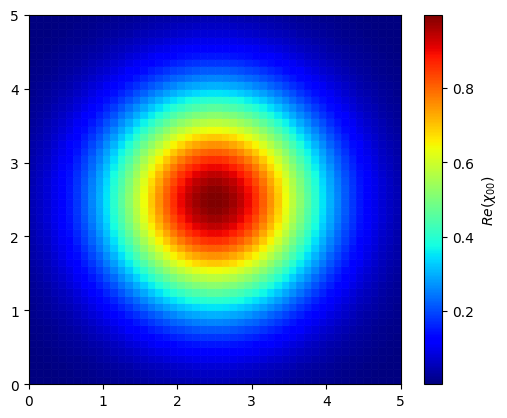

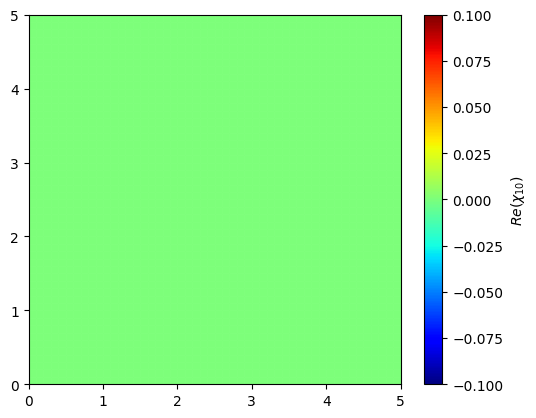

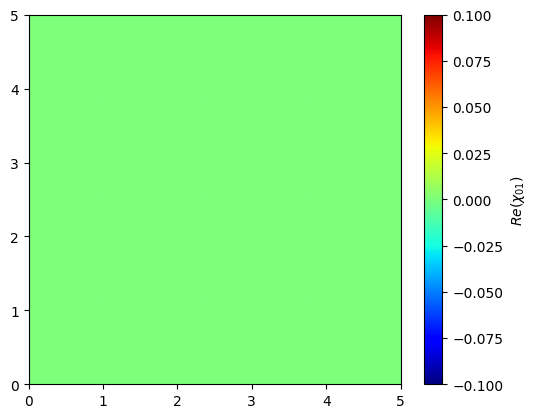

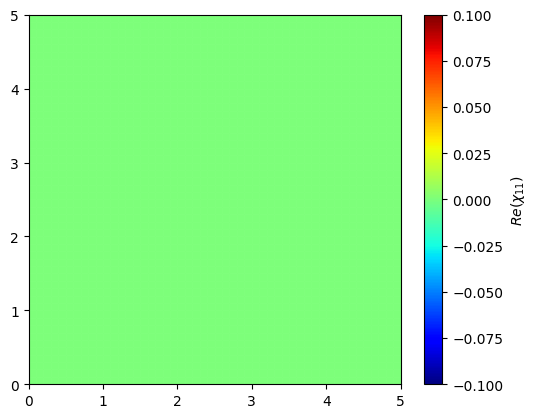

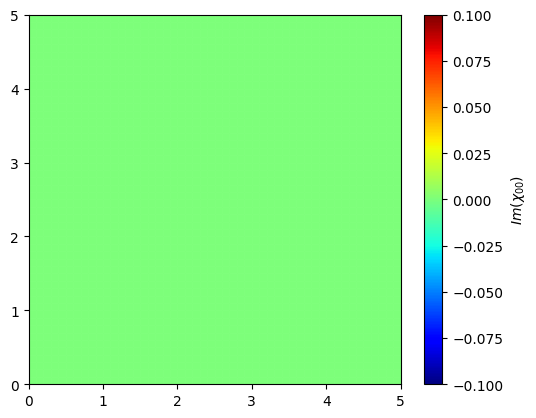

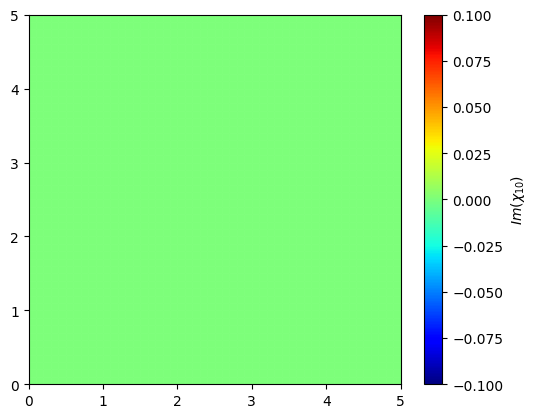

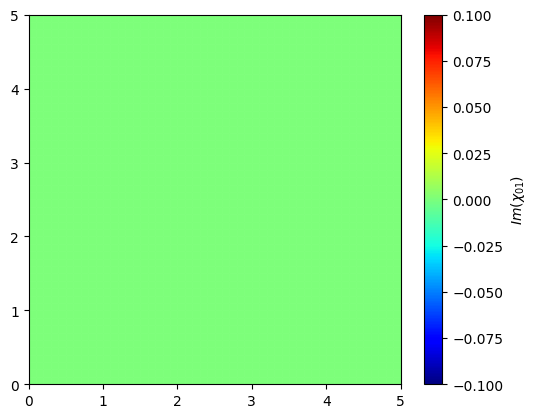

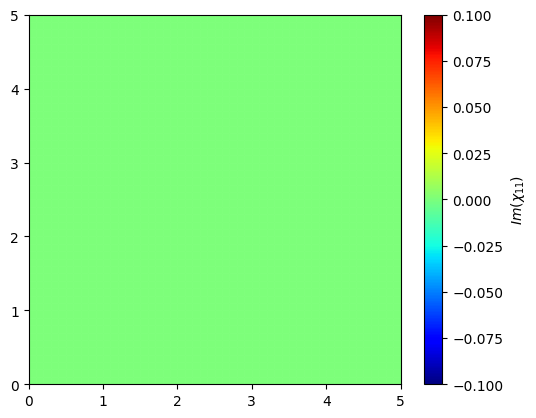

In [13]:
viewer1 = Viewer2D((chiR00))
viewer2 = Viewer2D((chiR10))
viewer3 = Viewer2D((chiR01))
viewer4 = Viewer2D((chiR11))

viewera = Viewer2D((chiI00))
viewerb = Viewer2D((chiI10))
viewerc = Viewer2D((chiI01))
viewerd = Viewer2D((chiI11))

In [14]:
from builtins import range
chiR11_T = []
chiR10_T = []
chiR01_T = []
chiR00_T = []

chiI11_T = []
chiI10_T = []
chiI01_T = []
chiI00_T = []
for t in range(6000):
    chiR11.updateOld()
    chiR10.updateOld()
    chiR01.updateOld()
    chiR00.updateOld()
    
    chiI11.updateOld()
    chiI10.updateOld()
    chiI01.updateOld()
    chiI00.updateOld()
    
    eqn.solve(dt=1.e-2)
    
    
    chiR11_T.append(CellVariable(mesh=mesh, value=chiR11.value))
    chiR10_T.append(CellVariable(mesh=mesh, value=chiR10.value))
    chiR01_T.append(CellVariable(mesh=mesh, value=chiR01.value))
    chiR00_T.append(CellVariable(mesh=mesh, value=chiR00.value))
    
    chiI11_T.append(CellVariable(mesh=mesh, value=chiI11.value))
    chiI10_T.append(CellVariable(mesh=mesh, value=chiI10.value))
    chiI01_T.append(CellVariable(mesh=mesh, value=chiI01.value))
    chiI00_T.append(CellVariable(mesh=mesh, value=chiI00.value))
    
    #viewer.plot()

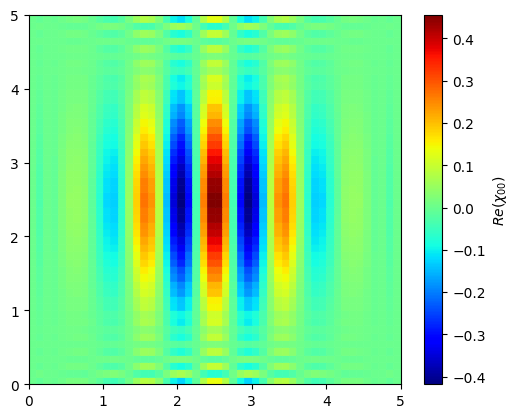

In [15]:
viewer1.plot()

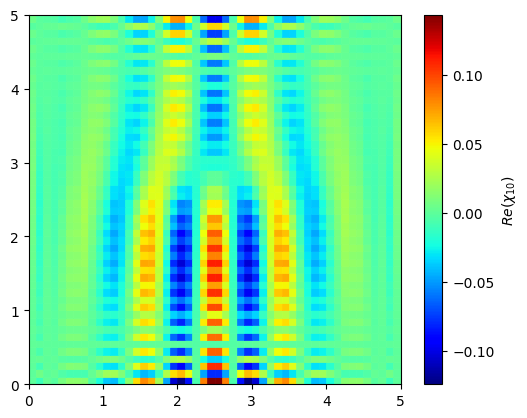

In [16]:
viewer2.plot()

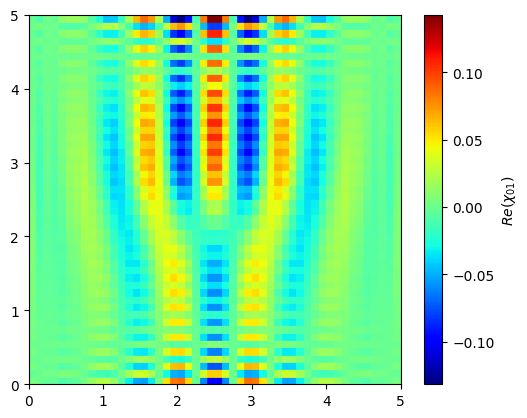

In [17]:
viewer3.plot()

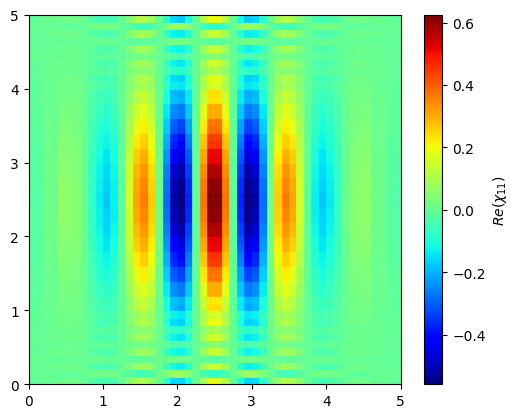

In [18]:
viewer4.plot()

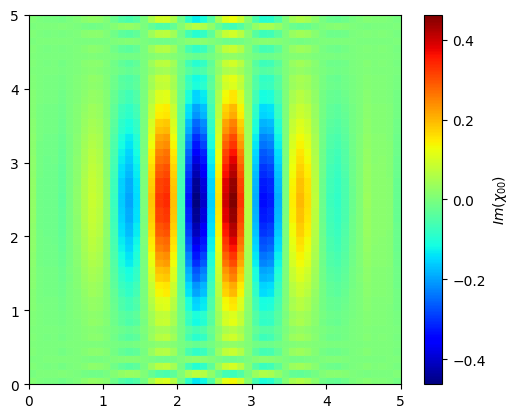

In [19]:
viewera.plot()

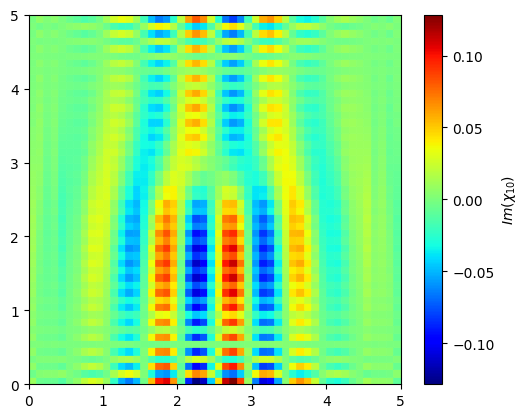

In [20]:
viewerb.plot()

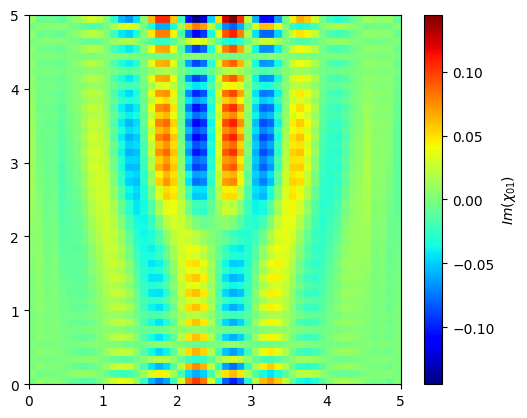

In [21]:
viewerc.plot()

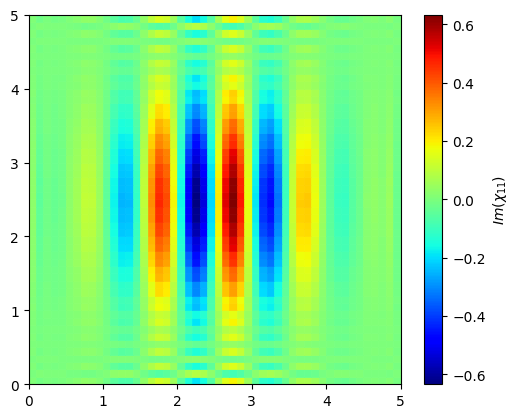

In [22]:
viewerd.plot()

#### 

In [23]:
np.save('chiR11_T.npy', chiR11_T)
np.save('chiR10_T.npy', chiR10_T)
np.save('chiR01_T.npy', chiR01_T)
np.save('chiR00_T.npy', chiR00_T)

np.save('chiI11_T.npy', chiI11_T)
np.save('chiI10_T.npy', chiI10_T)
np.save('chiI01_T.npy', chiI01_T)
np.save('chiI00_T.npy', chiI00_T)

In [24]:
chiR11_T = np.load('chiR11_T.npy')
chiR10_T = np.load('chiR10_T.npy')
chiR01_T = np.load('chiR01_T.npy')
chiR00_T = np.load('chiR00_T.npy')

chiI11_T = np.load('chiI11_T.npy')
chiI10_T = np.load('chiI10_T.npy')
chiI01_T = np.load('chiI01_T.npy')
chiI00_T = np.load('chiI00_T.npy')

In [25]:
CHI00_beta_zero = chiR00_T[:,index_where_1[0][0]]+chiI00_T[:,index_where_1[0][0]]*1.0j
CHI01_beta_zero = chiR01_T[:,index_where_1[0][0]]+chiI01_T[:,index_where_1[0][0]]*1.0j
CHI10_beta_zero = chiR10_T[:,index_where_1[0][0]]+chiI10_T[:,index_where_1[0][0]]*1.0j
CHI11_beta_zero = chiR11_T[:,index_where_1[0][0]]+chiI11_T[:,index_where_1[0][0]]*1.0j

In [26]:
def abs2(x):
    return x.real**2 + x.imag**2
E_B = omega_0*CHI11_beta_zero
ergotr_B_by_omega = (0.5)*(np.sqrt(np.square(CHI11_beta_zero-CHI00_beta_zero)+4*abs2(CHI10_beta_zero))+CHI11_beta_zero-CHI00_beta_zero)

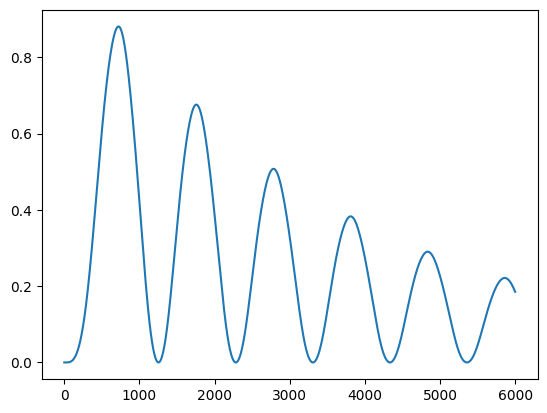

In [27]:
plt.plot(ergotr_B_by_omega.real)
plt.show()

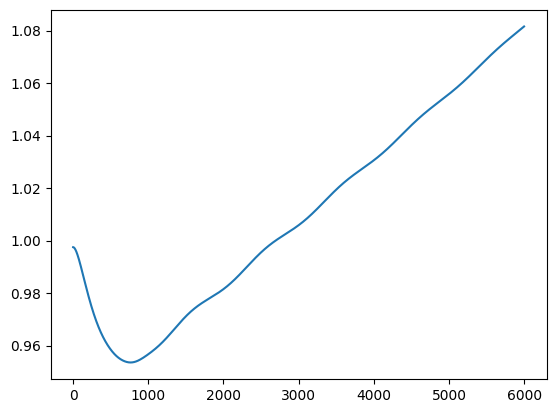

In [28]:
condition1 =  CHI11_beta_zero.real+ CHI00_beta_zero.real
condition2 = CHI11_beta_zero.imag+CHI00_beta_zero.imag 
plt.plot(condition1)
plt.show()

In [29]:
eq1R = TransientTerm(var=chiR11) == -((g/2)* chiI10).grad[0] +((g/2)*chiR10).grad[1]- ((g/2)*chiI01.grad[0]) - ((g/2)*chiR01.grad[1]) - ((g/2)*(x-(nx*dx)/2)*chiI10) + ((g/2)*(y-(ny*dy)/2)*chiR10) - ((g/2)*(x-(nx*dx)/2)*chiI01) - ((g/2)*(y-(ny*dy)/2)*chiR01) -2*F*(x-(nx*dx)/2)*chiI11 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiR11 - gamma*0.5*((x-(nx*dx)/2)*chiR11.grad[0]+(y-(ny*dy)/2)*chiR11.grad[1]) 
eq1I = TransientTerm(var=chiI11) == ((g/2)* chiR10).grad[0] +((g/2)*chiI10).grad[1]+ ((g/2)*chiR01.grad[0]) - ((g/2)*chiI01.grad[1]) + ((g/2)*(x-(nx*dx)/2)*chiR10) + ((g/2)*(y-(ny*dy)/2)*chiI10) - ((g/2)*(x-(nx*dx)/2)*chiR01) - ((g/2)*(y-(ny*dy)/2)*chiI01) +2*F*(x-(nx*dx)/2)*chiR11 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiI11 - gamma*0.5*((x-(nx*dx)/2)*chiI11.grad[0]+(y-(ny*dy)/2)*chiI11.grad[1]) 

eq2R = TransientTerm(var=chiR10) == -((g/2)* chiI00).grad[0] +((g/2)*chiI11).grad[0]- ((g/2)*chiR00.grad[1]) + ((g/2)*chiR11.grad[1]) - ((g/2)*(x-(nx*dx)/2)*chiI11) - ((g/2)*(x-(nx*dx)/2)*chiI00) - ((g/2)*(y-(ny*dy)/2)*chiR11) - ((g/2)*(y-(ny*dy)/2)*chiR00) -2*F*(x-(nx*dx)/2)*chiI10 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiR10 - gamma*0.5*((x-(nx*dx)/2)*chiR10.grad[0]+(y-(ny*dy)/2)*chiR10.grad[1]) 
eq2I = TransientTerm(var=chiI10) == -((g/2)* chiI00).grad[1] +((g/2)*chiI11).grad[1]+ ((g/2)*chiR00.grad[0]) - ((g/2)*chiR11.grad[0]) + ((g/2)*(x-(nx*dx)/2)*chiR11) - ((g/2)*(y-(ny*dy)/2)*chiI00) - ((g/2)*(y-(ny*dy)/2)*chiI11) + ((g/2)*(x-(nx*dx)/2)*chiR00) +2*F*(x-(nx*dx)/2)*chiR10 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiI10 - gamma*0.5*((x-(nx*dx)/2)*chiI10.grad[0]+(y-(ny*dy)/2)*chiI10.grad[1]) 


eq3R = TransientTerm(var=chiR01) == -((g/2)*(x-(nx*dx)/2)*chiI11) - ((g/2)*(x-(nx*dx)/2)*chiI00) + ((g/2)*(y-(ny*dy)/2)*chiR11) + ((g/2)*(y-(ny*dy)/2)*chiR00) + ((g/2)*chiI11).grad[0] - ((g/2)*chiR11.grad[1]) - ((g/2)* chiI00).grad[0] + ((g/2)*chiR00.grad[1]) -2*F*(x-(nx*dx)/2)*chiI01 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiR01 - gamma*0.5*((x-(nx*dx)/2)*chiR01.grad[0]+(y-(ny*dy)/2)*chiR01.grad[1]) 
eq3I = TransientTerm(var=chiI01) == ((g/2)*(x-(nx*dx)/2)*chiR11) + ((g/2)*(x-(nx*dx)/2)*chiR00) + ((g/2)*(y-(ny*dy)/2)*chiI11) + ((g/2)*(y-(ny*dy)/2)*chiI00) - ((g/2)*chiR11).grad[0] - ((g/2)*chiI11.grad[1]) + ((g/2)* chiR00).grad[0] + ((g/2)*chiI00.grad[1]) +2*F*(x-(nx*dx)/2)*chiR01 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiI01 - gamma*0.5*((x-(nx*dx)/2)*chiI01.grad[0]+(y-(ny*dy)/2)*chiI01.grad[1]) 

eq4R = TransientTerm(var=chiR00) == - ((g/2)*(x-(nx*dx)/2)*chiI10) + ((g/2)*(y-(ny*dy)/2)*chiR10) - ((g/2)*(x-(nx*dx)/2)*chiI01) - ((g/2)*(y-(ny*dy)/2)*chiR01) + ((g/2)* chiI10).grad[0] - ((g/2)*chiR10).grad[1] + ((g/2)*chiI01.grad[0]) + ((g/2)*chiR01.grad[1]) -2*F*(x-(nx*dx)/2)*chiI00 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiR00 - gamma*0.5*((x-(nx*dx)/2)*chiR00.grad[0]+(y-(ny*dy)/2)*chiR00.grad[1])
eq4I = TransientTerm(var=chiI00) == + ((g/2)*(x-(nx*dx)/2)*chiR10) + ((g/2)*(y-(ny*dy)/2)*chiI10) + ((g/2)*(x-(nx*dx)/2)*chiR01) - ((g/2)*(y-(ny*dy)/2)*chiI01) - ((g/2)* chiR10).grad[0] - ((g/2)*chiI10).grad[1] - ((g/2)*chiR01.grad[0]) + ((g/2)*chiI01.grad[1]) +2*F*(x-(nx*dx)/2)*chiR00 -gamma*0.5*(numerix.square((x-(nx*dx)/2))+numerix.square((y-(ny*dy)/2)))*chiI00 - gamma*0.5*((x-(nx*dx)/2)*chiI00.grad[0]+(y-(ny*dy)/2)*chiI00.grad[1]) 